### INTERNSHIP 32

# Fake News Project

-------------------

## Submitted by : Shahla M

### Flip Robo Technologies

### Problem Statement :-

Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

#### -Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

#### What is a Fake News?
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.

For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.



In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
fake_data  = pd.read_csv(r"C:\Users\sahal\OneDrive\Documents\Flip Robo Asgmnt\Fake News Project\Fake.csv")

In [3]:
fake_data 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


### Displaying first five rows

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_data.shape

(23481, 4)

### Checking for the null values

In [6]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Observations :
There are no null values present

In [7]:
data=fake_data.iloc[:,0:4]
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Filling missing values

In [8]:
#filling missing values
data['subject']=data['subject'].fillna(data['subject'].mode()[0])
data['date']=data['date'].fillna(data['date'].mode()[0])

In [9]:


data=data.assign(label=0)
data.head()



,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


###  Collecting the true news

In [12]:
true_data= pd.read_csv(r"C:\Users\sahal\OneDrive\Documents\Flip Robo Asgmnt\Fake News Project\True.csv")

In [13]:


true_data.head()



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


##### checking the numner of columns and rows in the dataset

In [14]:
true_data.shape

(21417, 4)

### Checking the null values

In [15]:


true_data.isnull().sum()



title      0
text       0
subject    0
date       0
dtype: int64

### Displaying the head 

In [16]:


true_data=true_data.assign(label=1)
true_data.head()



,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [17]:


true_data.shape



(21417, 5)

In [18]:
data=data.append(true_data,ignore_index=True)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [19]:


data.shape



(44898, 5)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [27]:
data['title']=data['title'].str.lower()
data['text']=data['text'].str.lower()
data['subject']=data['subject'].str.lower()
data['date']=data['date'].str.lower()

### Removing the numbers

In [28]:
# Removing numbers
data['title']=data['title'].replace(to_replace="[0-9]",value='', regex=True)
data['text']=data['text'].replace(to_replace="[0-9]",value='', regex=True)
data['subject']=data['subject'].replace(to_replace="[0-9]",value='', regex=True)
data['date']=data['date'].replace(to_replace="[0-9]",value='', regex=True)

### Removing stopwards

In [ ]:
# Removing stopwords
stop= stopwords.words('english')
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['text'] = data['text'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop)]))
data['subject'] = data['subject'].apply(lambda z: ' '.join([word for word in z.split() if word not in (stop)]))

### Removing symbols

In [29]:
# Removing symbols
data['title']=data['title'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['text']=data['text'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['subject']=data['subject'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['date']=data['date'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)




In [32]:
data.head()

,title,text,subject,date,label
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,december,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,december,0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,news,december,0
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,news,december,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,december,0


### Observations :

 - Displaying the head of the data after removing numbers, symbols and stopwards

### 

In [33]:
data['subject'].value_counts()

politicsnews       11272
worldnews          10145
news                9050
politics            6841
leftnews            4459
government news     1570
usnews               783
middleeast           778
Name: subject, dtype: int64

In [34]:
data['subject']=data['subject'].replace(['news','politics'],['worldnews','politicsnews'])


worldnews          19195
politicsnews       18113
leftnews            4459
government news     1570
usnews               783
middleeast           778
Name: subject, dtype: int64


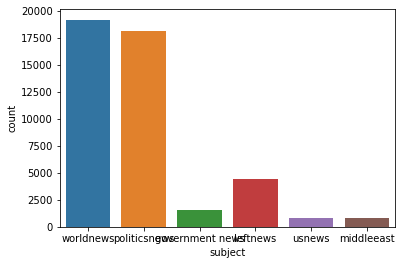

In [35]:
ax= sns.countplot(x='subject',data=data)
print(data['subject'].value_counts())

0    23481
1    21417
Name: label, dtype: int64


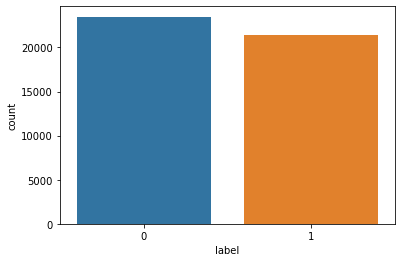

In [36]:
ax= sns.countplot(x='label',data=data)
print(data['label'].value_counts())

## EDA

In [37]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44898 non-null  float64
 1   text     44898 non-null  float64
 2   subject  44898 non-null  float64
 3   date     44898 non-null  float64
 4   label    44898 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 MB


In [39]:


data.describe()



,title,text,subject,date,label
count,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000
mean,19872.460778,18890.651588,3.551628,23.770569,0.477015
std,11003.485472,11297.156481,1.467171,13.193514,0.499477
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10806.250000,9290.250000,3.000000,10.000000,0.000000
50%,19888.500000,19031.500000,3.000000,27.000000,0.000000
75%,29305.750000,28316.750000,5.000000,35.000000,1.000000
max,38693.000000,38645.000000,5.000000,41.000000,1.000000


## Correlation :

In [40]:


data.corr()



,title,text,subject,date,label
title,1.000000,0.148021,-0.361085,0.075457,0.371321
text,0.148021,1.000000,-0.120011,-0.027608,0.167037
subject,-0.361085,-0.120011,1.000000,0.153658,0.257612
date,0.075457,-0.027608,0.153658,1.000000,0.219934
label,0.371321,0.167037,0.257612,0.219934,1.000000


<AxesSubplot:>

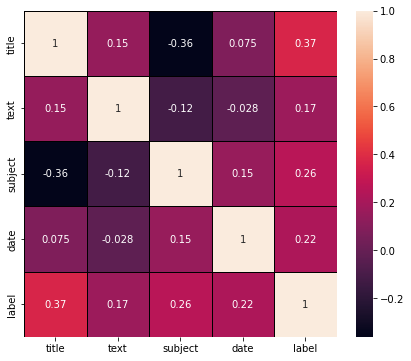

In [41]:


plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')



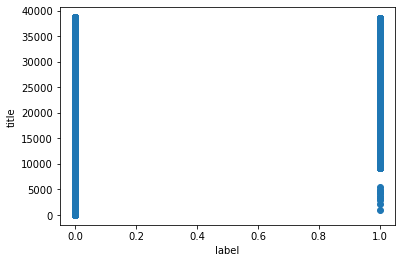

In [42]:
plt.scatter(data['label'],data['title'])
plt.xlabel('label')
plt.ylabel('title')
plt.show()

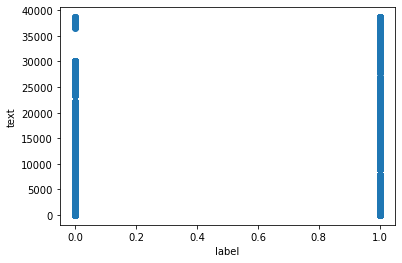

In [43]:
plt.scatter(data['label'],data['text'])
plt.xlabel('label')
plt.ylabel('text')
plt.show()



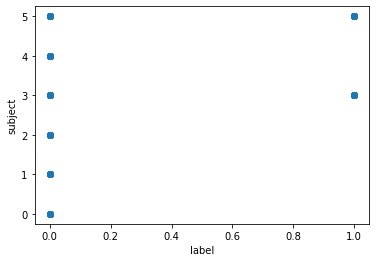

In [44]:
plt.scatter(data['label'],data['subject'])
plt.xlabel('label')
plt.ylabel('subject')
plt.show()

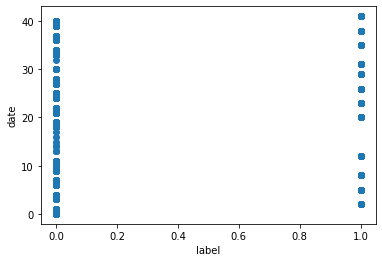

In [45]:
plt.scatter(data['label'],data['date'])
plt.xlabel('label')
plt.ylabel('date')
plt.show()

## Data Modelling

In [46]:
x=data.drop(['label'],axis=1)
y=data['label']

## Logic Regression

In [47]:
lr=LogisticRegression()

In [48]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 63.137966144839
Testing accuracy score: 62.4573125463994


random state 1
Training accuracy score: 62.79114165712104
Testing accuracy score: 63.59317000742391


random state 2
Training accuracy score: 63.05205549191803
Testing accuracy score: 62.783964365256125


random state 3
Training accuracy score: 61.94794450808197
Testing accuracy score: 61.57386785449146


random state 4
Training accuracy score: 63.332060582919695
Testing accuracy score: 62.25686711210096


random state 5
Training accuracy score: 62.11658393788978
Testing accuracy score: 61.23979213066073


random state 6
Training accuracy score: 61.722031309660174
Testing accuracy score: 62.21974758723088


random state 7
Training accuracy score: 61.9288532518773
Testing accuracy score: 61.72234595397179


random state 8
Training accuracy score: 63.17614865724831
Testing accuracy score: 62.52412769116555


random state 9
Training accuracy score: 61.88112511136566
Testing accuracy score: 6

In [49]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=46)


In [50]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 63.03637713437268


In [51]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[3193 3752]
 [1227 5298]]


In [52]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

           0       0.72      0.46      0.56      6945
           1       0.59      0.81      0.68      6525

    accuracy                           0.63     13470
   macro avg       0.65      0.64      0.62     13470
weighted avg       0.66      0.63      0.62     13470



## ROC AUC Curve :

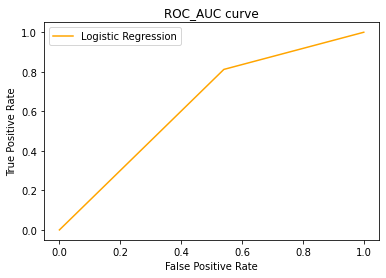

AUC_score 63.58546212854696


In [53]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

## K Neighbors Classifier :

In [54]:


knn= KNeighborsClassifier()



In [55]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 93.96716303932799
Testing accuracy score: 91.07646622123237


random state 1
Training accuracy score: 93.72534046073565
Testing accuracy score: 91.12100965107646


random state 2
Training accuracy score: 93.79852360952017
Testing accuracy score: 90.79435783221975


random state 3
Training accuracy score: 93.78261422934962
Testing accuracy score: 91.29918337045287


random state 4
Training accuracy score: 94.08807432862416
Testing accuracy score: 90.81662954714179


random state 5
Training accuracy score: 94.0021636757032
Testing accuracy score: 90.8611729769859


random state 6
Training accuracy score: 93.79852360952017
Testing accuracy score: 90.92798812175205


random state 7
Training accuracy score: 93.91307114674812
Testing accuracy score: 90.60876020786934


random state 8
Training accuracy score: 94.0021636757032
Testing accuracy score: 90.89086859688196


random state 9
Training accuracy score: 93.8080692376225
Testing accuracy score: 91.1

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=68) 


In [58]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 90.65330363771344


## Confusion Matrix:

In [59]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[6432  558]
 [ 701 5779]]


In [60]:


clr=classification_report(y_test,y_pred2)
print(clr)



              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6990
           1       0.91      0.89      0.90      6480

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## ROC AUC Curve

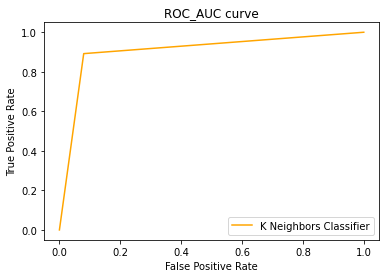

AUC_score 90.59963307370317


In [61]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

## Random Forest Classifier:

In [62]:
rfc=RandomForestClassifier()

In [63]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 98.98292501855977


random state 1
Training accuracy score: 100.0
Testing accuracy score: 98.99777282850779


random state 2
Training accuracy score: 100.0
Testing accuracy score: 99.17594654788418


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.06458797327394


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.13140311804008


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.10913140311804


random state 6
Training accuracy score: 100.0
Testing accuracy score: 99.27988121752041


random state 7
Training accuracy score: 100.0
Testing accuracy score: 99.14625092798812


random state 8
Training accuracy score: 100.0
Testing accuracy score: 99.2279138827023


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.19821826280624


random state 10
Training accuracy score: 100.0
Testing accuracy score: 99.07201187824796


random sta

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=93)


In [65]:
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 99.24276169265033


In [66]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[7012   32]
 [  70 6356]]


In [67]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7044
           1       0.99      0.99      0.99      6426

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



## ROC AUC Curve

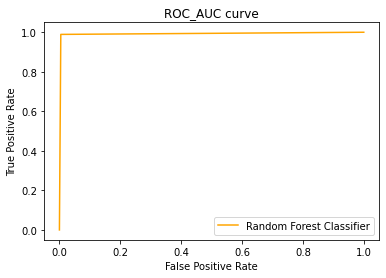

AUC_score 99.22819402226156


In [68]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

## Decision Tree Classifier:

In [69]:
clf=DecisionTreeClassifier()

In [70]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 97.91388270230141


random state 1
Training accuracy score: 100.0
Testing accuracy score: 97.96585003711952


random state 2
Training accuracy score: 100.0
Testing accuracy score: 97.92873051224944


random state 3
Training accuracy score: 100.0
Testing accuracy score: 98.11432813659985


random state 4
Training accuracy score: 100.0
Testing accuracy score: 97.728285077951


random state 5
Training accuracy score: 100.0
Testing accuracy score: 98.12917594654789


random state 6
Training accuracy score: 100.0
Testing accuracy score: 98.26280623608018


random state 7
Training accuracy score: 100.0
Testing accuracy score: 98.04008908685968


random state 8
Training accuracy score: 100.0
Testing accuracy score: 97.93615441722346


random state 9
Training accuracy score: 100.0
Testing accuracy score: 97.80994803266519


random state 10
Training accuracy score: 100.0
Testing accuracy score: 98.01781737193764


random stat

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=40)


In [72]:
clf.fit(x_train,y_train)
y_pred4 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 98.30734966592428


In [73]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[6894  111]
 [ 117 6348]]


In [74]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7005
           1       0.98      0.98      0.98      6465

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



## ROC AUC Curve

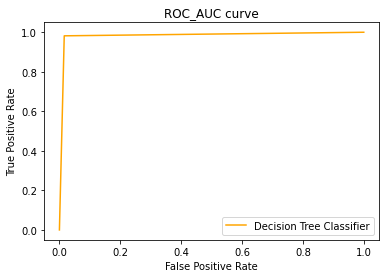

AUC_score 98.30283638965207


In [75]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

### OBSERVATION:

- Decision Tree Classifier predicts better result for this problem. 
- It gives highest score as 98.3 %. So i consider this model as a best model. 
- Accuracy score is good thats why i don't require to tune the parameters.

In [76]:
import joblib
joblib.dump(y_pred4,"Fake_News_Project.pkl")

['Fake_News_Project.pkl']

# CONCLUSION:

In [77]:
Predicted_label=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred4})
Predicted_label

,Actual data,Predicted data
37325,1,1
33133,1,1
1540,0,0
1674,0,0
22048,0,0
...,...,...
16177,0,0
40823,1,1
1123,0,0
19167,0,0
